# Лабораторная работа №2. Методы оптимизации
### Студент: Шереметов В.Р.
### Группа: РК6-63Б

### Задание:
Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.

Например, найти значения параметров, обеспечивающие минимальную разницу между числом "хищников" и числом "жертв" на всем интервале моделирования.

### Уравнения Лотки-Вольтерры[https://ru.wikipedia.org/wiki/Модель_Лотки_—_Вольтерры]:

$$dx/dt=(alpha-beta*y)x,$$

$$dy/dt=(-gamma+delta*x)y,$$

где x - количество жертв, y - количество хищников, t - время, alpha, beta, gamma, delta - коэффициенты, отражающие взаимодействия между видами.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize

In [1]:
class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
    self._dt = dt
    self._n_iters = int(tmax / dt)

    self.pred_init = pred_init
    self.prey_init = prey_init

    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    """
    Simulation settings:
        alpha - prey growth
        beta - prey mortality
        delta - predator growrh
        gamma - predator mortality
    """
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.xlabel('n predators')
    plt.ylabel('n preys')
    plt.plot(self.pred, self.prey, color='black')
    plt.grid()
    plt.show()

### Критерий устойчивости
Зададимся следующим критерием устойчивости системы: минимизация значения разницы числа хищников и числа жертв при росте количества обитателей биома.

alpha = 1.7151810371992944
beta  = 1.7663641721369627
gamma = 1.6170949719520835
delta = 1.5702752280738541


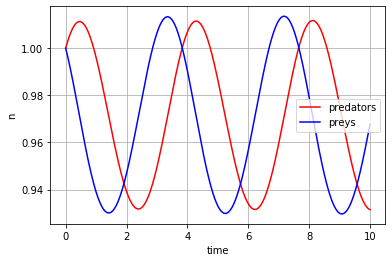

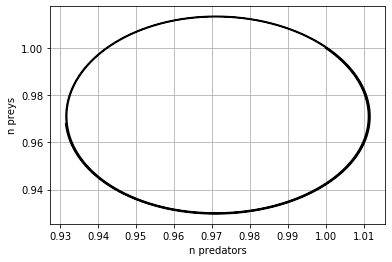

In [3]:
def maxdif(par):
    maxd = 0
    maxprey = 0
    maxpred = 0
    biome = Biome(tmax = 10)
    biome.run(par[0], par[1], par[2], par[3])
    for i in range(0, biome._n_iters):
        if math.fabs(biome.prey[i] - biome.pred[i]) > maxd:
            maxd = math.fabs(biome.prey[i] - biome.pred[i])
        if maxprey < biome.prey[i]:
            maxprey = biome.prey[i]
        if maxpred < biome.pred[i]:
            maxpred = biome.pred[i]
    if maxd == 0:
        maxd = 10000
    del biome
    return maxd / ((maxprey + maxpred) / 2)

sln = minimize(maxdif,[2, 1, 2, 1])
print ('alpha =', sln.x[0])
print ('beta  =', sln.x[1])
print ('gamma =', sln.x[2])
print ('delta =', sln.x[3])
biome = Biome(tmax = 10)
biome.run(sln.x[0], sln.x[1], sln.x[2], sln.x[3])
biome.plot()
biome.plot_cycle()